## Find critical temperature using heat capacity and inverse temperature graph

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.ndimage import convolve , generate_binary_structure

In [84]:
N = 32
J = 1

In [85]:
def fn_totalE(arr):
    kernel = generate_binary_structure(2,1) #rank = 2 (2D lattice structure) , connectivity = 1 (only 4 nearest neighbours, diagonal atoms are not neighbours)

    array = -arr * convolve(arr , kernel , mode = 'constant',cval = 0)
    return array.sum() * J

In [86]:
def fn_flip(arr,x, y, initial_spin_val,p):
    if (arr[y][x] == initial_spin_val):
        flip_probability = random.random()
        if(flip_probability < p):
            arr[y][x] = initial_spin_val * (-1)
            return True
        else:
            return False
    else:
        return False

In [87]:
def fn_neighbour_list(arr , x, y):
    neighbour_arr = []

    if(y > 0): #above
        neighbour_arr.append([x , y - 1 , arr[y - 1][x]])
    if(x > 0): #right
        neighbour_arr.append([x - 1 , y , arr[y][x - 1]])
    if (y < N-1 ): #down
        neighbour_arr.append([x , y + 1 , arr[y + 1][x]])
    if (x < N-1 ): #left
        neighbour_arr.append([x + 1 , y , arr[y][x + 1]])
    return neighbour_arr

In [88]:
def fn_traverse(arr , initial_spin_value, x , y, neigh_arr,p):
    
    if not fn_flip(arr,x,y , initial_spin_value,p):
        return
    
    for n in neigh_arr:
        next_neigh_arr = fn_neighbour_list(arr , n[0],  n[1])
        fn_traverse(arr , initial_spin_value , n[0] , n[1] , next_neigh_arr,p)

In [89]:
def fn_wolff_alg(arr,p):
    #step1: select a random spin in the lattice
    rand_x = int(np.random.randint(0,N))
    rand_y = int(np.random.randint(0,N))
    initial_spin_value = arr[rand_y][rand_x]
    flipped_spin_value = initial_spin_value * (-1)
    arr[rand_y][rand_x] = flipped_spin_value

    first_neighbour_arr = fn_neighbour_list(arr,rand_x , rand_y)

    for n in first_neighbour_arr:
        fn_flip(arr,int(n[0]) , int(n[1]),initial_spin_value,p)
        next_neigh_arr = fn_neighbour_list(arr , int(n[0]),  int(n[1]))
        fn_traverse(arr , initial_spin_value , int(n[0]) , int(n[1]) , next_neigh_arr,p)

    return arr

In [90]:
def fn_initialise(N):
    initial_random_num_arr = np.random.random((N,N))
    initial_arr = np.zeros((N,N))
    initial_arr[initial_random_num_arr >= 0.75] = -1
    initial_arr[initial_random_num_arr < 0.75] = 1
    return initial_arr

In [91]:
beta = [0.30,0.35,0.40,0.45,0.50,0.55,0.60]
heat_cap = []
total_iteration_num = 3000

for i in range(0,7):
    this_beta = beta[i]
    p = 1 - np.exp(-2 * this_beta * J )
    energy_arr = []

    lattice_arr = fn_initialise(N)

    for j in range(total_iteration_num):
        fn_wolff_alg(lattice_arr,p)
        if(j >= 1500):
            energy_arr.append(fn_totalE(lattice_arr)) 
    
    energy_std = np.std(energy_arr)
    
    this_heat_cap = (energy_std * this_beta) * (energy_std * this_beta)/((1.38E-23))
    
    heat_cap.append(this_heat_cap) # calculate the energy std from the 1000th iteration and the 5000th iteration and multiply it with current beta


Text(0.5, 0, '$\\beta$')

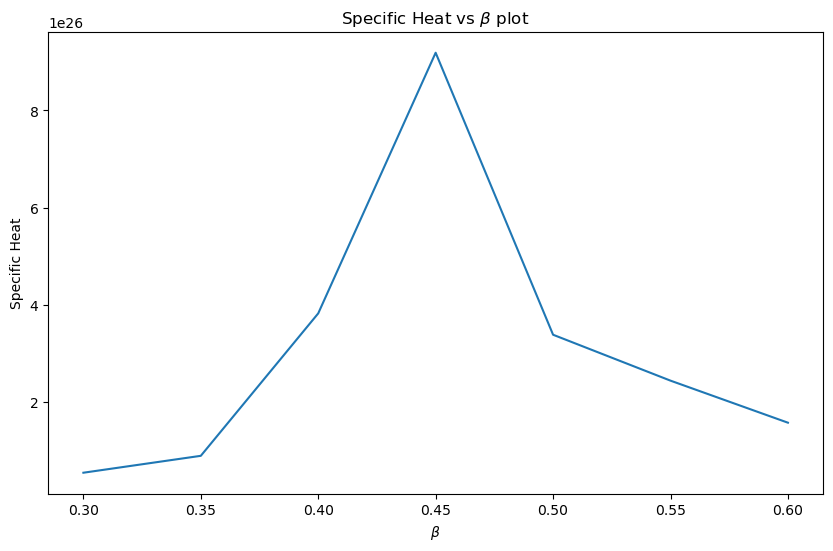

In [92]:
plt. figure(figsize=(10, 6))
plt.plot(beta ,heat_cap )
plt.title(r'Specific Heat vs $\beta$ plot')
plt.ylabel(r'Specific Heat')
plt.xlabel(r'$\beta$')